<a href="https://colab.research.google.com/github/Diptyregar456/Projects/blob/main/mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving mnist.csv.zip to mnist.csv.zip


In [ ]:
#unzip the files
from zipfile import ZipFile
file_name = "mnist.csv.zip"
with ZipFile(file_name, 'r')as zip:
  zip.extractall()
  print('Done')


Done


In [ ]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




In [ ]:
# load data from kaggle dataset
train_data = pd.read_csv("/content/mnist_train.csv", header=0)
train_label = train_data['label']
train_img = train_data.iloc[:,1:] / 255  # scale
train_img = train_img.to_numpy()
train_img.resize(28000, 28, 28, 1)

test_data = pd.read_csv("/content/mnist_test.csv", header=0)
test_img = test_data.copy() / 255  # scale
test_img = test_img.to_numpy()
test_img.resize(28000, 28, 28, 1)
# check sample submission
submission = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=0)
submission.head()



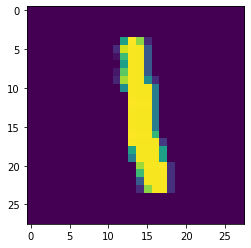

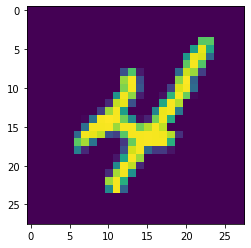

In [ ]:
# plot some examples
samples = np.random.randint(0,10,2)
for i in samples:
    plt.imshow(np.resize(train_img[i], (28, 28)))
    plt.show()

In [ ]:
# to get 1.00 accuracy, train on entire MNIST dataset, added from kaggle datasets in .csv
mnist_train = pd.read_csv("/content/mnist_train.csv")
mnist_test = pd.read_csv("/content/mnist_test.csv")
mnist = pd.concat([mnist_train, mnist_test], axis=0)

# Get all mnist as training
mnist_train_label = mnist['label']
mnist_train_img = mnist.drop('label', axis=1).to_numpy()
mnist_train_img = mnist_train_img / 255  # scale
mnist_train_img.resize(70000, 28, 28, 1)

In [ ]:
# build image data generator with keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # Parameters for data augmentation:
     featurewise_center=True,
     featurewise_std_normalization=True,
     rotation_range=20,
     width_shift_range=0.2,
     height_shift_range=0.2,
     horizontal_flip=True 
)

datagen.fit(mnist_train_img)

Using TensorFlow backend.


In [ ]:
# create the NN model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
#    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(192, (5,5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(2,2, padding='same'),
#    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
#    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 192)         0

In [ ]:
history = model.fit_generator(datagen.flow(mnist_train_img, mnist_train_label, batch_size=256),
                              epochs=50,
                              verbose=1,
                              validation_data=(train_img, train_label),
                              shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
   1455/Unknown - 9082s 6s/step - loss: 0.1804 - acc: 0.9396

In [ ]:
predictions = model.predict(test_img).argmax(axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
results = pd.DataFrame({"ImageId": range(1, len(test_img)+1), "Label": predictions})
results.to_csv("predictions_submission.csv", header=True, index=False)

# New Section